In [1]:
import datetime

import tszip

# install sc2ts using python -m pip install git+https://github.com/jeromekelleher/sc2ts
# where python is the python running in your jupytyer notebook (find this by
# import sys; print(sys.executable)
import sc2ts

ts = tszip.decompress(f"../data/upgma-mds-1000-md-30-mm-3-2022-06-30-recinfo-gisaid-il.ts.tsz")  # long ARG
# or use ts = tszip.decompress(f"data/upgma-full-md-30-mm-3-2021-06-30-recinfo-il.ts.tsz")  # wide ARG

treeinfo = sc2ts.TreeInfo(ts)

# Setup reporting (this is a bit of a jupyter hack)
def report(*args, **kwargs):
    display(*treeinfo.node_report(*args, **kwargs))


Classifying mutations: 100%|██████████| 1062072/1062072 [00:16<00:00, 65043.90it/s]


In [2]:
breaks = treeinfo.export_recombinant_breakpoints()


In [3]:
import collections
Xlineages = collections.defaultdict(list)
for n in ts.nodes():
    if n.is_sample() and n.metadata.get("Nextclade_pango", "").startswith("X"):
        Xlineages[n.metadata["Nextclade_pango"]].append(n.id)
print("Total number of samples", {k: len(v) for k, v in Xlineages.items()})

Total number of samples {'XA': 5, 'XB': 58, 'XC': 5, 'XD': 4, 'XH': 11, 'XF': 2, 'XS': 6, 'XZ': 92, 'XG': 32, 'XAF': 36, 'XN': 69, 'XE': 170, 'XM': 48, 'XV': 3, 'XK': 6, 'XAB': 50, 'XT': 1, 'XL': 10, 'XR': 8, 'XP': 2, 'XQ': 14, 'XAD': 6, 'XAH': 14, 'XW': 11, 'XAA': 8, 'XY': 6, 'XU': 3, 'XAC': 27, 'XJ': 3, 'XAE': 9, 'XAG': 17, 'XAJ': 12, 'XAK': 1}


In [4]:
focal_pango = "XAG"
closest_recombinant = {}
for tree in ts.trees():
    for u in Xlineages[focal_pango]:
        recom, _ = treeinfo._get_closest_recombinant(tree, u)
        if (
            u not in closest_recombinant or
            ts.nodes_time[closest_recombinant[u]] > ts.nodes_time[recom]
        ):
            closest_recombinant[u] = recom
print(f"Closest recombination node to each {focal_pango} sample (sample, recombination node):")
for x in closest_recombinant.items():
    print(x)

Closest recombination node to each XAG sample (sample, recombination node):
(712029, 635896)
(716314, 635896)
(721534, 635896)
(723273, 635896)
(724536, 635896)
(726303, 635896)
(730054, 635896)
(731054, 635896)
(731055, 635896)
(733491, 635896)
(735572, 635896)
(744053, 635896)
(745430, 635896)
(745431, 635896)
(749379, 635896)
(758437, 635896)
(772243, 635896)


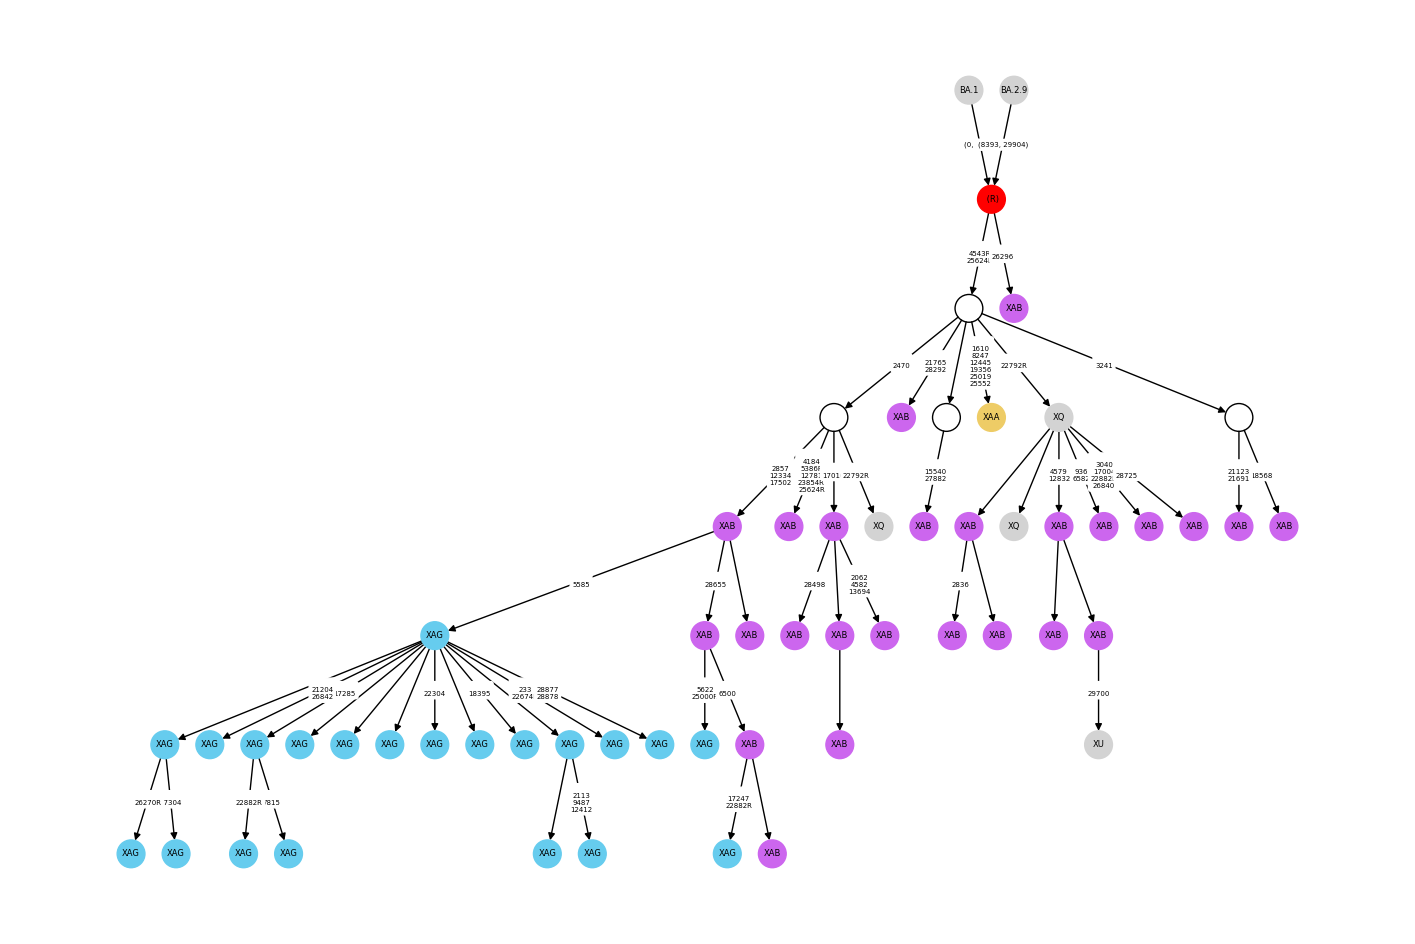

In [5]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(18, 12))

sc2ts.sample_subgraph(
    712029, 
    ts, 
    treeinfo, 
    mutations_json_filepath="../data/consensus_mutations.json",
    ax=ax,
    ts_id_labels=False,
    node_metadata_labels="Imputed_Nextclade_pango",  # can easily change to "Imputed_GISAID_lineage"
    sample_metadata_labels="",
    node_size=400,
    node_label_replace={"Unknown":"", "Unknown ":"", },
    node_colours={
        "XAG": "#66CCEE",
        "Unknown (R)": "red",
        "Unknown": "None",
        "XAB": "#CC66EE",
        "BA.2": "#CCEE66",
        "XAA": "#EECC66",
        None: "lightgray", # Default
    },
    colour_metadata_key="Imputed_Nextclade_pango"
)
plt.show()

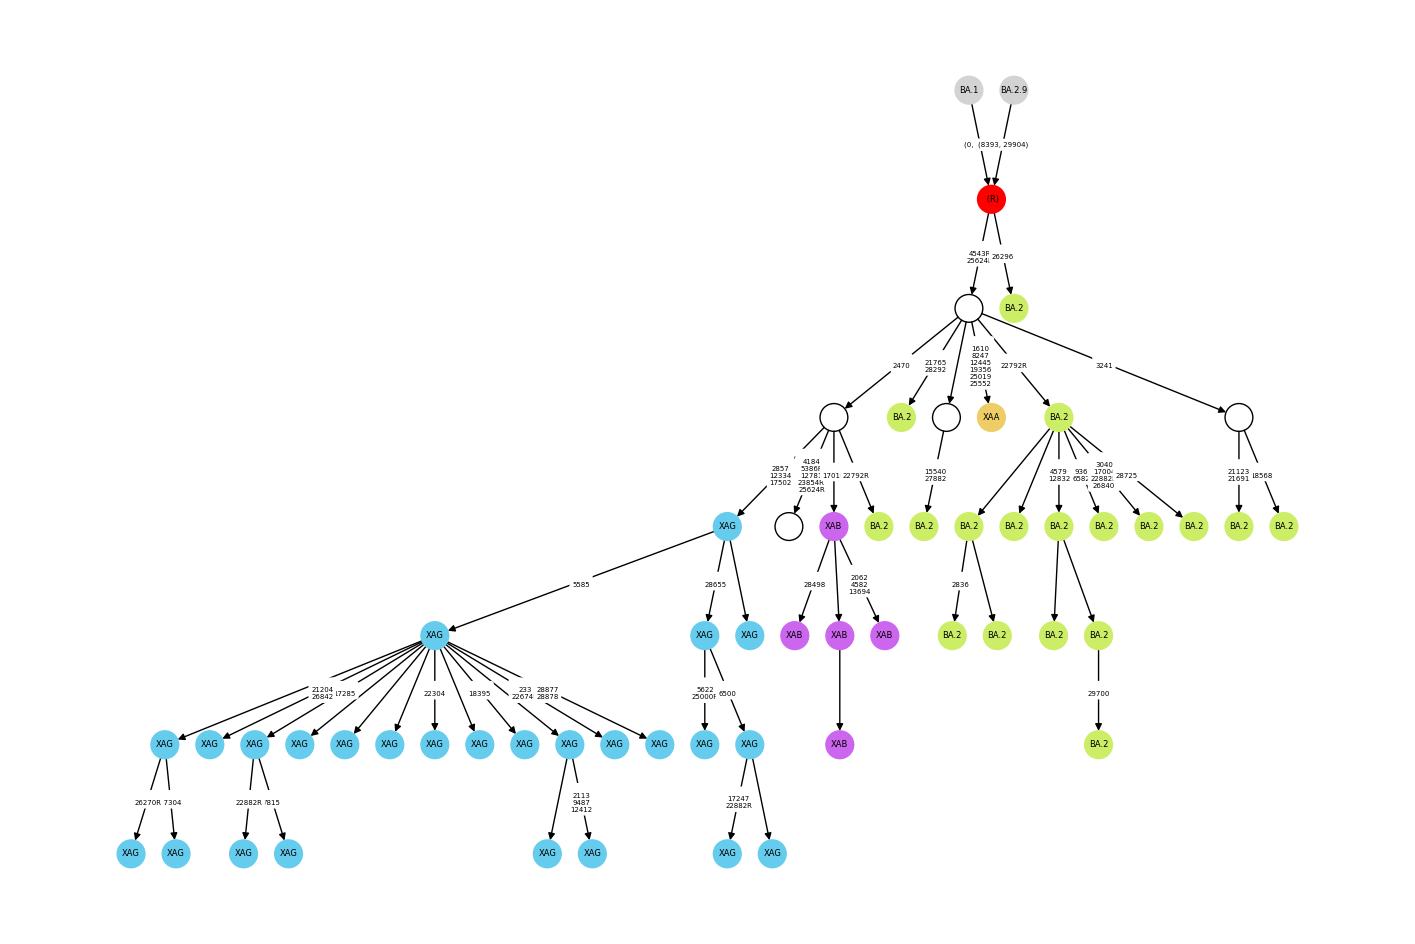

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(18, 12))

sc2ts.sample_subgraph(
    712029, 
    ts, 
    treeinfo, 
    mutations_json_filepath="../data/consensus_mutations.json",
    ax=ax,
    ts_id_labels=False,
    node_metadata_labels="Imputed_GISAID_lineage",  # can easily change to "Imputed_GISAID_lineage"
    sample_metadata_labels="",
    node_size=400,
    node_label_replace={"Unknown":"", "Unknown ":"", },
    node_colours={
        "XAG": "#66CCEE",
        "Unknown (R)": "red",
        "Unknown": "None",
        "XAB": "#CC66EE",
        "BA.2": "#CCEE66",
        "XAA": "#EECC66",
        None: "lightgray", # Default
    },
    colour_metadata_key="Imputed_GISAID_lineage"
)
plt.show()